## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap SVC discovery scan (insane)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_svc_discovery_insane'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.056518
Name: time, dtype: float64

In [4]:
duration_list = []
#print(len(merged))
for t in scan_list:
#    t['time'] = pd.to_datetime(t['time'], unit='s')
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    0.056518
1    0.063052
2    0.079351
3    0.070525
4    0.066710
5    0.215525
6    0.914552
7    0.059644
8    0.056817
9    0.091776
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp

,0
0,0.056518
1,0.063052
2,0.079351
3,0.070525
4,0.066710
5,0.215525
6,0.914552
7,0.059644
8,0.056817
9,0.091776


In [8]:
temp.mean()

0    0.167447
dtype: float64

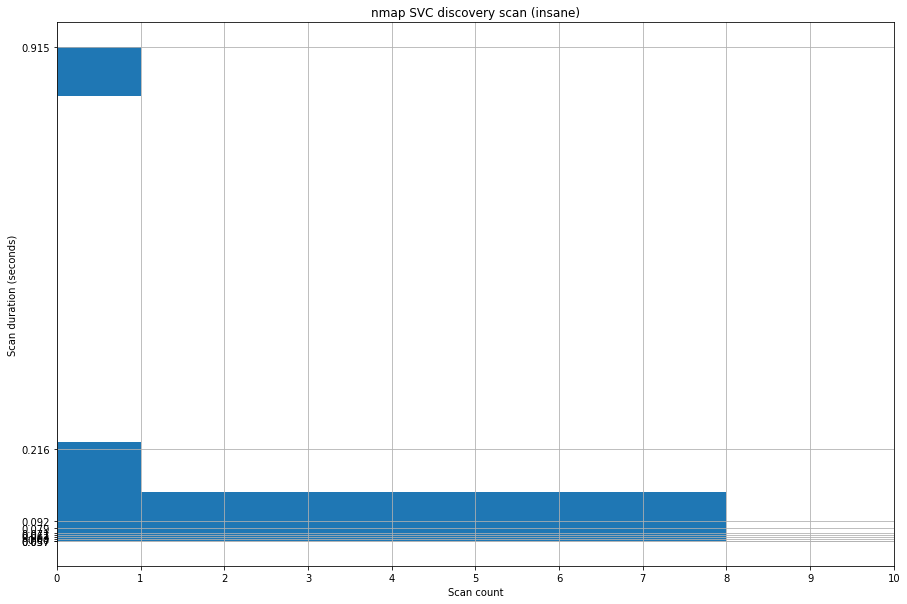

In [9]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [10]:
temp.describe()

,0
count,10.000000
mean,0.167447
std,0.266785
min,0.056518
25%,0.060496
50%,0.068618
75%,0.088670
max,0.914552


## Packet count

In [11]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [12]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [13]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 3348.940372467041



## Order of ports scanned


In [14]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 45370 1025
2 45370 8888
3 45370 554
4 45370 25
5 45370 5900
6 45370 111
7 45370 445
8 45370 443
9 45370 587
10 45370 993
11 45370 22
12 45370 995
13 45370 139
14 45370 113
15 45370 23
16 45370 53
17 45370 143
18 45370 135
19 45370 1720
20 45370 3306
21 45370 80
22 45370 199
23 45370 1723
24 45370 21
25 45370 8080
26 45370 256
27 45370 110
28 45370 3389
29 45370 44176
30 45370 1717
31 45370 6881
32 45370 7999
33 45370 5431
34 45370 49156
35 45370 5810
36 45370 32778
37 45370 7625
38 45370 13782
39 45370 8021
40 45370 2126
41 45370 1087
42 45370 1234
43 45370 8222
44 45370 3546
45 45370 500
46 45370 9878
47 45370 50636
48 45370 1248
49 45370 5500
50 45370 15004
51 45370 481
52 45370 2522
53 45370 34573
54 45370 1687
55 45370 17877
56 45370 1084
57 45370 51103
58 45370 5087
59 45370 2998
60 45370 99
61 45370 8181
62 45370 9103
63 45370 6669
64 45370 1461
65 45370 49176
66 45370 9900
67 45370 1494
68 45370 24800
69 45370 56737
70 45370 1688
71 45370 6668
72 45370 8087
73 45370 10004
74 4

621 45370 8193
622 45370 1050
623 45370 49152
624 45370 1132
625 45370 9998
626 45370 4449
627 45370 2557
628 45370 10003
629 45370 5802
630 45370 1137
631 45370 631
632 45370 3826
633 45370 1097
634 45370 52869
635 45370 4001
636 45370 1060
637 45370 9110
638 45370 912
639 45370 3703
640 45370 1075
641 45370 5510
642 45370 1198
643 45370 5357
644 45370 10243
645 45370 2909
646 45370 5190
647 45370 1124
648 45370 1169
649 45370 255
650 45370 27000
651 45370 1271
652 45370 544
653 45370 3784
654 45370 9011
655 45370 1812
656 45370 902
657 45370 52848
658 45370 3030
659 45370 3766
660 45370 6101
661 45370 5906
662 45370 33354
663 45370 1044
664 45370 14000
665 45370 306
666 45370 1073
667 45370 8100
668 45370 427
669 45370 783
670 45370 16113
671 45370 62078
672 45370 3889
673 45370 990
674 45370 1034
675 45370 1801
676 45370 1233
677 45370 5825
678 45370 6969
679 45370 8300
680 45370 5718
681 45370 259
682 45370 3871
683 45370 683
684 45370 625
685 45370 2301
686 45370 1199
687 45370 25

224 40268 1104
225 40268 50800
226 40268 2179
227 40268 1863
228 40268 5414
229 40268 32774
230 40268 1301
231 40268 44442
232 40268 6669
233 40268 1594
234 40268 55600
235 40268 301
236 40268 8290
237 40268 3071
238 40268 5987
239 40268 5050
240 40268 1010
241 40268 3260
242 40268 4848
243 40268 5911
244 40268 1218
245 40268 32770
246 40268 1839
247 40268 9968
248 40268 1064
249 40268 8193
250 40268 1002
251 40268 31337
252 40268 40193
253 40268 1700
254 40268 2383
255 40268 1075
256 40268 3006
257 40268 2002
258 40268 1088
259 40268 8651
260 40268 6779
261 40268 1131
262 40268 898
263 40268 1801
264 40268 8099
265 40268 5859
266 40268 3007
267 40268 6901
268 40268 9011
269 40268 64680
270 40268 5952
271 40268 2035
272 40268 5431
273 40268 32
274 40268 3372
275 40268 3905
276 40268 406
277 40268 3828
278 40268 50636
279 40268 543
280 40268 24800
281 40268 5544
282 40268 10628
283 40268 6788
284 40268 2222
285 40268 7200
286 40268 8009
287 40268 1121
288 40268 2702
289 40268 3995
290 4

788 40268 6547
789 40268 901
790 40268 1036
791 40268 1066
792 40268 7435
793 40268 7201
794 40268 63331
795 40268 1761
796 40268 800
797 40268 999
798 40268 8600
799 40268 49175
800 40268 9071
801 40268 13782
802 40268 50500
803 40268 5440
804 40268 18988
805 40268 765
806 40268 7004
807 40268 5555
808 40268 3737
809 40268 1533
810 40268 5678
811 40268 3690
812 40268 787
813 40268 2107
814 40268 808
815 40268 2047
816 40268 5405
817 40268 49160
818 40268 1755
819 40268 57294
820 40268 1149
821 40268 2045
822 40268 2013
823 40268 14000
824 40268 2710
825 40268 2034
826 40268 500
827 40268 5033
828 40268 9666
829 40268 3371
830 40268 1000
831 40268 20828
832 40268 6646
833 40268 513
834 40268 3800
835 40268 20005
836 40268 524
837 40268 3077
838 40268 1192
839 40268 1169
840 40268 6389
841 40268 11110
842 40268 427
843 40268 2042
844 40268 1138
845 40268 3030
846 40268 8292
847 40268 2288
848 40268 30718
849 40268 5030
850 40268 2190
851 40268 3404
852 40268 9091
853 40268 1073
854 4026

454 60077 1556
455 60077 1122
456 60077 2522
457 60077 19315
458 60077 7938
459 60077 7402
460 60077 5100
461 60077 888
462 60077 3
463 60077 722
464 60077 2144
465 60077 1123
466 60077 1084
467 60077 1501
468 60077 20221
469 60077 2967
470 60077 10566
471 60077 8090
472 60077 901
473 60077 2170
474 60077 3031
475 60077 1900
476 60077 4321
477 60077 9103
478 60077 6100
479 60077 1044
480 60077 5566
481 60077 666
482 60077 787
483 60077 2875
484 60077 5950
485 60077 16080
486 60077 18101
487 60077 9011
488 60077 2160
489 60077 5101
490 60077 1296
491 60077 32783
492 60077 3325
493 60077 2260
494 60077 5679
495 60077 20000
496 60077 2121
497 60077 8010
498 60077 50002
499 60077 10000
500 60077 13782
501 60077 5811
502 60077 2068
503 60077 911
504 60077 1029
505 60077 8007
506 60077 2717
507 60077 5989
508 60077 18988
509 60077 1102
510 60077 2200
511 60077 3128
512 60077 5802
513 60077 8086
514 60077 3221
515 60077 1000
516 60077 211
517 60077 1998
518 60077 1130
519 60077 7937
520 60077

121 46083 6969
122 46083 55055
123 46083 1049
124 46083 497
125 46083 9100
126 46083 3784
127 46083 888
128 46083 6789
129 46083 2100
130 46083 1213
131 46083 54045
132 46083 514
133 46083 1058
134 46083 19801
135 46083 1533
136 46083 5718
137 46083 32784
138 46083 12345
139 46083 32772
140 46083 14238
141 46083 3920
142 46083 5002
143 46083 3914
144 46083 3580
145 46083 1658
146 46083 6129
147 46083 1839
148 46083 3800
149 46083 5959
150 46083 15003
151 46083 49160
152 46083 1068
153 46083 43
154 46083 900
155 46083 8100
156 46083 10180
157 46083 808
158 46083 705
159 46083 6543
160 46083 33899
161 46083 3325
162 46083 50500
163 46083 9878
164 46083 6059
165 46083 2144
166 46083 1021
167 46083 2399
168 46083 40193
169 46083 5060
170 46083 1147
171 46083 2002
172 46083 10012
173 46083 3986
174 46083 1875
175 46083 1244
176 46083 1163
177 46083 1029
178 46083 464
179 46083 1094
180 46083 2717
181 46083 5440
182 46083 711
183 46083 106
184 46083 16012
185 46083 1594
186 46083 44176
187 4

787 46083 2099
788 46083 57294
789 46083 3269
790 46083 3546
791 46083 617
792 46083 50001
793 46083 3006
794 46083 4848
795 46083 3390
796 46083 1972
797 46083 1093
798 46083 10243
799 46083 109
800 46083 5550
801 46083 9002
802 46083 2008
803 46083 49157
804 46083 2383
805 46083 1023
806 46083 3322
807 46083 6669
808 46083 5911
809 46083 407
810 46083 5963
811 46083 1984
812 46083 5269
813 46083 7070
814 46083 9
815 46083 49159
816 46083 898
817 46083 3211
818 46083 2910
819 46083 2038
820 46083 1039
821 46083 783
822 46083 6002
823 46083 9090
824 46083 27352
825 46083 2034
826 46083 1088
827 46083 563
828 46083 8009
829 46083 8333
830 46083 5901
831 46083 9877
832 46083 6001
833 46083 9666
834 46083 1074
835 46083 7443
836 46083 4242
837 46083 1503
838 46083 668
839 46083 50006
840 46083 49154
841 46083 3367
842 46083 8011
843 46083 49999
844 46083 9500
845 46083 5633
846 46083 50003
847 46083 9071
848 46083 4111
849 46083 2522
850 46083 515
851 46083 1091
852 46083 1141
853 46083 1

454 33228 2557
455 33228 49400
456 33228 6580
457 33228 1524
458 33228 20828
459 33228 1500
460 33228 26
461 33228 49159
462 33228 1112
463 33228 79
464 33228 7778
465 33228 49163
466 33228 1065
467 33228 1092
468 33228 5101
469 33228 5061
470 33228 1093
471 33228 3995
472 33228 1043
473 33228 3077
474 33228 3986
475 33228 2522
476 33228 49167
477 33228 20031
478 33228 61900
479 33228 544
480 33228 1100
481 33228 8899
482 33228 8994
483 33228 21571
484 33228 2049
485 33228 714
486 33228 10243
487 33228 13456
488 33228 49999
489 33228 2041
490 33228 981
491 33228 3659
492 33228 1812
493 33228 5500
494 33228 1287
495 33228 8090
496 33228 60020
497 33228 2161
498 33228 7002
499 33228 6006
500 33228 5730
501 33228 55056
502 33228 24800
503 33228 3905
504 33228 7443
505 33228 3007
506 33228 222
507 33228 5952
508 33228 16113
509 33228 6007
510 33228 3052
511 33228 800
512 33228 2607
513 33228 5560
514 33228 3809
515 33228 5087
516 33228 3703
517 33228 100
518 33228 801
519 33228 2006
520 33

120 39909 9200
121 39909 44176
122 39909 32768
123 39909 6003
124 39909 5959
125 39909 1309
126 39909 548
127 39909 16016
128 39909 1049
129 39909 1198
130 39909 9111
131 39909 7201
132 39909 9001
133 39909 6100
134 39909 10004
135 39909 32785
136 39909 5004
137 39909 3690
138 39909 8011
139 39909 49160
140 39909 2190
141 39909 1093
142 39909 8010
143 39909 6788
144 39909 30000
145 39909 254
146 39909 617
147 39909 9009
148 39909 5904
149 39909 43
150 39909 1030
151 39909 2399
152 39909 18101
153 39909 5298
154 39909 8192
155 39909 3168
156 39909 777
157 39909 1028
158 39909 3998
159 39909 1102
160 39909 7938
161 39909 37
162 39909 2008
163 39909 1594
164 39909 711
165 39909 500
166 39909 4003
167 39909 3546
168 39909 61532
169 39909 50002
170 39909 25735
171 39909 1059
172 39909 5825
173 39909 6668
174 39909 4343
175 39909 22939
176 39909 1037
177 39909 3580
178 39909 4443
179 39909 1047
180 39909 15000
181 39909 2909
182 39909 3766
183 39909 20031
184 39909 3325
185 39909 2381
186 39

692 39909 900
693 39909 1080
694 39909 5906
695 39909 4662
696 39909 23502
697 39909 458
698 39909 15004
699 39909 3551
700 39909 683
701 39909 1090
702 39909 1113
703 39909 1022
704 39909 3905
705 39909 8085
706 39909 9090
707 39909 3300
708 39909 9500
709 39909 8082
710 39909 5633
711 39909 19
712 39909 1311
713 39909 9900
714 39909 7921
715 39909 3827
716 39909 5560
717 39909 898
718 39909 8193
719 39909 9050
720 39909 7777
721 39909 3659
722 39909 1078
723 39909 1272
724 39909 1079
725 39909 2144
726 39909 51493
727 39909 9485
728 39909 5815
729 39909 9415
730 39909 8008
731 39909 1072
732 39909 1417
733 39909 8383
734 39909 1084
735 39909 5862
736 39909 1688
737 39909 1718
738 39909 2196
739 39909 144
740 39909 513
741 39909 9575
742 39909 888
743 39909 990
744 39909 6156
745 39909 32784
746 39909 125
747 39909 2045
748 39909 9877
749 39909 4321
750 39909 5911
751 39909 49158
752 39909 35500
753 39909 5877
754 39909 3914
755 39909 52822
756 39909 30951
757 39909 4005
758 39909 401

286 34070 27356
287 34070 7106
288 34070 10180
289 34070 683
290 34070 9099
291 34070 3659
292 34070 3390
293 34070 5915
294 34070 13456
295 34070 2381
296 34070 2007
297 34070 5431
298 34070 49163
299 34070 9618
300 34070 6006
301 34070 648
302 34070 1301
303 34070 1174
304 34070 19842
305 34070 8099
306 34070 25735
307 34070 10628
308 34070 3878
309 34070 8600
310 34070 32773
311 34070 7778
312 34070 7741
313 34070 60443
314 34070 14000
315 34070 903
316 34070 5222
317 34070 5280
318 34070 6007
319 34070 9010
320 34070 9878
321 34070 3998
322 34070 7920
323 34070 1046
324 34070 1187
325 34070 1113
326 34070 2701
327 34070 1070
328 34070 24444
329 34070 2034
330 34070 4224
331 34070 57294
332 34070 26214
333 34070 17877
334 34070 3809
335 34070 6788
336 34070 2251
337 34070 2601
338 34070 4662
339 34070 1056
340 34070 1064
341 34070 5054
342 34070 3971
343 34070 1199
344 34070 1011
345 34070 1533
346 34070 1641
347 34070 1334
348 34070 8193
349 34070 8088
350 34070 19350
351 34070 187

953 34070 1096
954 34070 8031
955 34070 56737
956 34070 981
957 34070 15004
958 34070 50300
959 34070 16001
960 34070 8292
961 34070 8290
962 34070 1864
963 34070 515
964 34070 301
965 34070 5440
966 34070 10616
967 34070 9917
968 34070 1047
969 34070 2042
970 34070 4449
971 34070 1043
972 34070 5998
973 34070 2190
974 34070 56738
975 34070 543
976 34070 16992
977 34070 16000
978 34070 1719
979 34070 3784
980 34070 311
981 34070 6547
982 34070 7025
983 34070 6699
984 34070 49156
985 34070 48080
986 34070 58080
987 34070 16113
988 34070 8010
989 34070 3905
990 34070 3880
991 34070 777
992 34070 3493
993 34070 617
994 34070 668
995 34070 12174
996 34070 6059
997 34070 49154
998 34070 20221
999 34070 15660
1000 34070 10012
1 59665 80
2 59665 256
3 59665 199
4 59665 445
5 59665 113
6 59665 110
7 59665 1723
8 59665 135
9 59665 8888
10 59665 143
11 59665 53
12 59665 993
13 59665 995
14 59665 25
15 59665 587
16 59665 23
17 59665 21
18 59665 8080
19 59665 1025
20 59665 443
21 59665 3389
22 596

619 59665 5802
620 59665 1700
621 59665 9999
622 59665 9207
623 59665 4998
624 59665 1111
625 59665 52869
626 59665 2126
627 59665 3517
628 59665 9898
629 59665 60020
630 59665 4449
631 59665 5555
632 59665 23502
633 59665 5002
634 59665 5101
635 59665 5915
636 59665 1094
637 59665 1234
638 59665 1036
639 59665 1062
640 59665 5904
641 59665 6006
642 59665 1097
643 59665 555
644 59665 427
645 59665 5087
646 59665 19101
647 59665 1001
648 59665 1971
649 59665 6779
650 59665 458
651 59665 10243
652 59665 50300
653 59665 2190
654 59665 3322
655 59665 5800
656 59665 2967
657 59665 1863
658 59665 32780
659 59665 7496
660 59665 58080
661 59665 8383
662 59665 2040
663 59665 340
664 59665 1131
665 59665 18040
666 59665 24444
667 59665 990
668 59665 1218
669 59665 9110
670 59665 5810
671 59665 5998
672 59665 32774
673 59665 10626
674 59665 32779
675 59665 5631
676 59665 1839
677 59665 3052
678 59665 3369
679 59665 911
680 59665 5902
681 59665 1165
682 59665 5500
683 59665 3017
684 59665 2382
685

286 61921 1805
287 61921 7106
288 61921 407
289 61921 5952
290 61921 1322
291 61921 5810
292 61921 1174
293 61921 6156
294 61921 301
295 61921 3030
296 61921 15000
297 61921 14442
298 61921 5061
299 61921 4343
300 61921 49160
301 61921 765
302 61921 3371
303 61921 33
304 61921 1972
305 61921 2043
306 61921 10628
307 61921 17877
308 61921 1021
309 61921 1455
310 61921 5950
311 61921 3517
312 61921 1218
313 61921 800
314 61921 1149
315 61921 1100
316 61921 6007
317 61921 9000
318 61921 2288
319 61921 2106
320 61921 2260
321 61921 667
322 61921 1434
323 61921 1063
324 61921 3914
325 61921 7025
326 61921 6106
327 61921 5555
328 61921 8083
329 61921 5080
330 61921 2013
331 61921 705
332 61921 6009
333 61921 49167
334 61921 1104
335 61921 4899
336 61921 8045
337 61921 19
338 61921 50800
339 61921 55056
340 61921 524
341 61921 1089
342 61921 1049
343 61921 1050
344 61921 306
345 61921 10024
346 61921 1001
347 61921 64680
348 61921 9091
349 61921 40193
350 61921 9003
351 61921 58080
352 61921 

952 61921 9001
953 61921 16012
954 61921 2701
955 61921 10004
956 61921 1163
957 61921 1056
958 61921 5001
959 61921 33899
960 61921 10629
961 61921 163
962 61921 82
963 61921 1047
964 61921 5815
965 61921 3003
966 61921 1041
967 61921 5822
968 61921 340
969 61921 990
970 61921 254
971 61921 30
972 61921 40911
973 61921 4125
974 61921 5280
975 61921 6565
976 61921 5190
977 61921 5432
978 61921 9999
979 61921 1091
980 61921 6004
981 61921 4900
982 61921 49165
983 61921 2875
984 61921 1199
985 61921 1352
986 61921 4
987 61921 10621
988 61921 28201
989 61921 1971
990 61921 161
991 61921 5903
992 61921 6123
993 61921 4445
994 61921 8873
995 61921 15002
996 61921 65000
997 61921 1233
998 61921 1066
999 61921 3827
1000 61921 16993
1 46303 8888
2 46303 995
3 46303 22
4 46303 443
5 46303 111
6 46303 80
7 46303 135
8 46303 445
9 46303 21
10 46303 3306
11 46303 993
12 46303 8080
13 46303 1720
14 46303 110
15 46303 23
16 46303 554
17 46303 1723
18 46303 25
19 46303 5900
20 46303 53
21 46303 3389


In [15]:
orders_port

,scannr,sport,dport
0,1,45370,1025
1,2,45370,8888
2,3,45370,554
3,4,45370,25
4,5,45370,5900
...,...,...,...
9995,996,46303,6792
9996,997,46303,8222
9997,998,46303,9011
9998,999,46303,8194


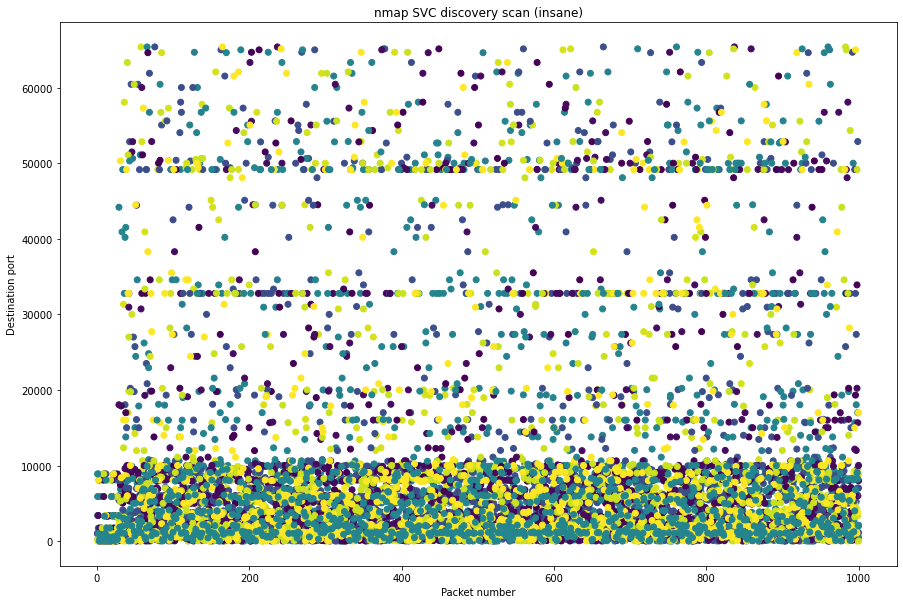

In [16]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [17]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [18]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

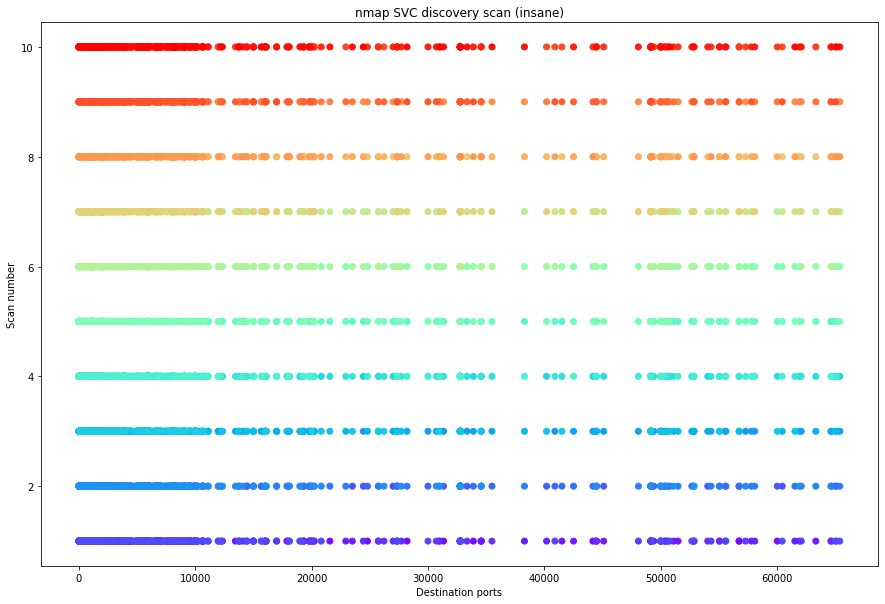

In [19]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [20]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

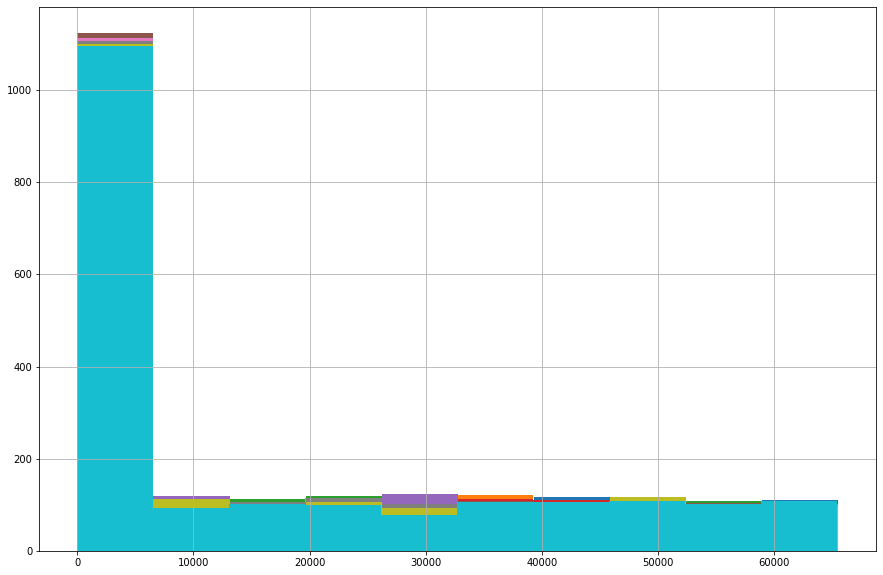

In [21]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

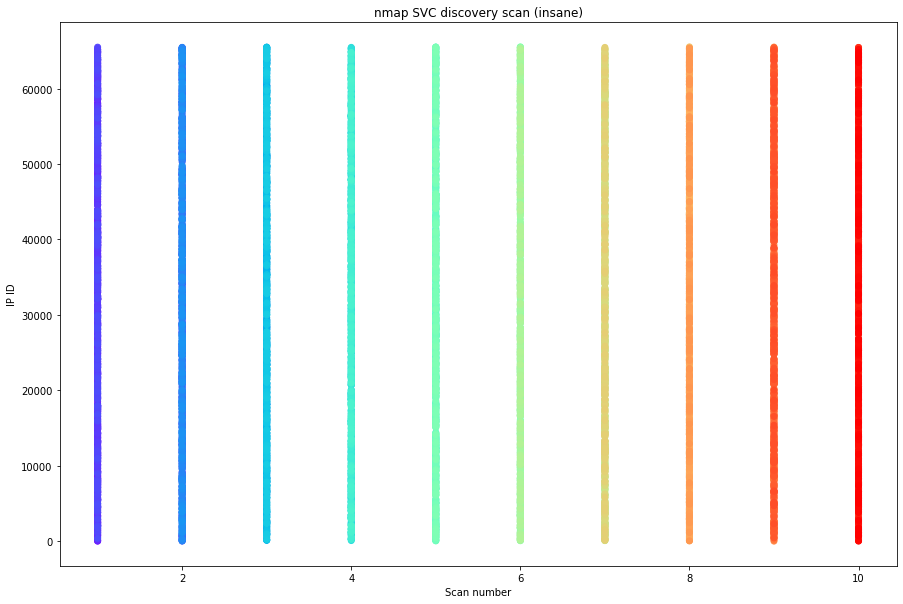

In [22]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


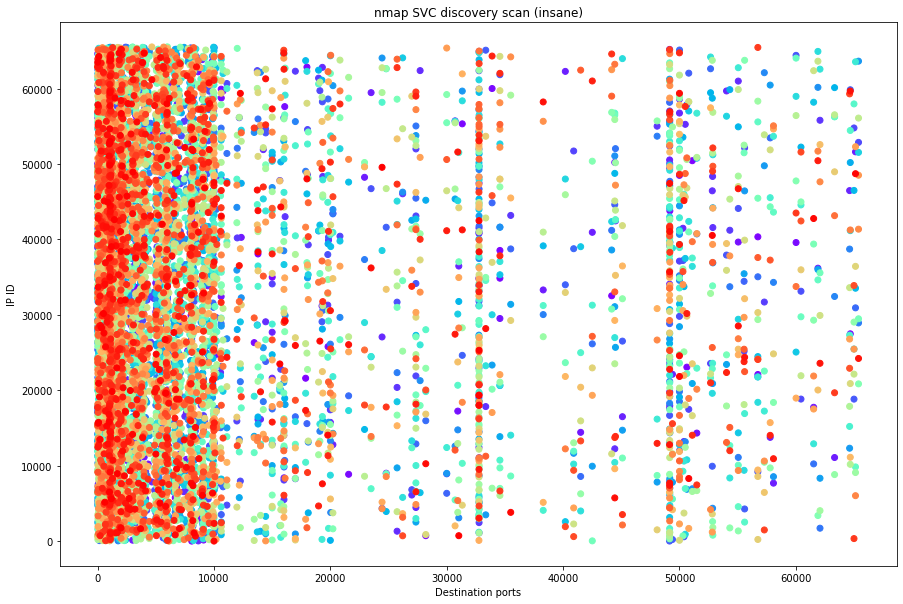

In [23]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

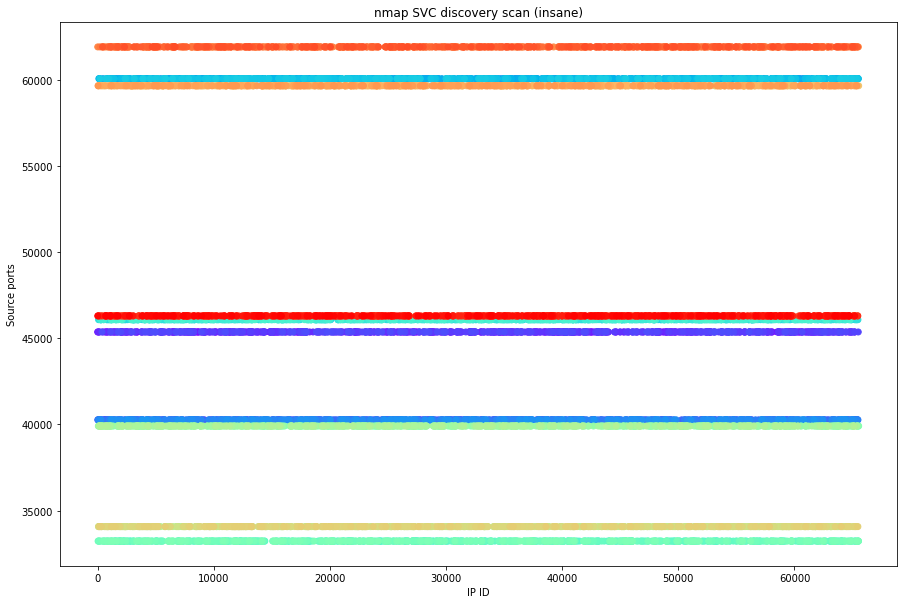

In [24]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

## TCP Window size

In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [27]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 3530296568
Sequence number: 353

Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
Sequence number: 139627603
S

Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 3536759579
Sequence number: 353

Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 2461637404
Sequence number: 246

Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 3635627343
Sequence number: 363

Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 4096420022
Sequence number: 409

Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 1358890593
Sequence number: 135

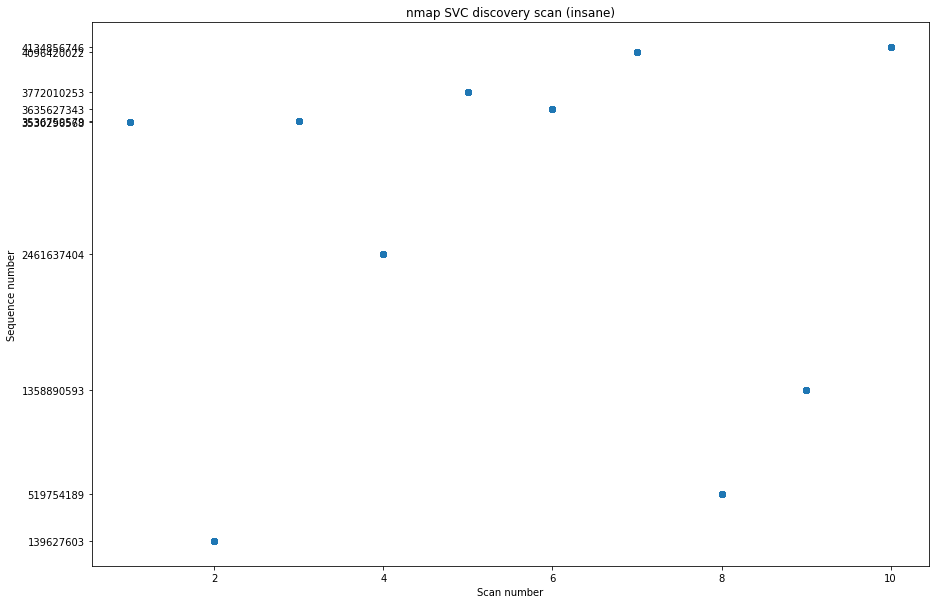

In [28]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


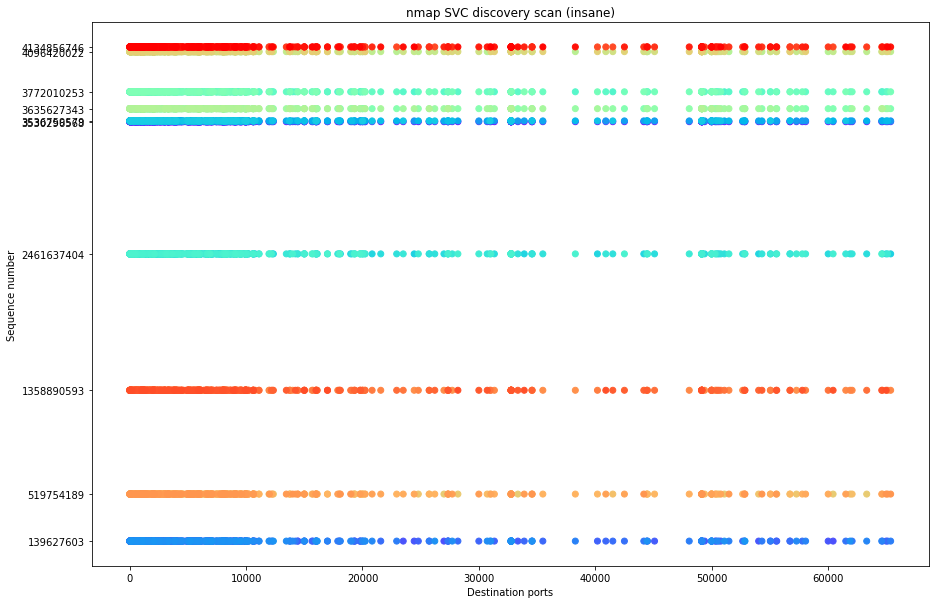

In [29]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

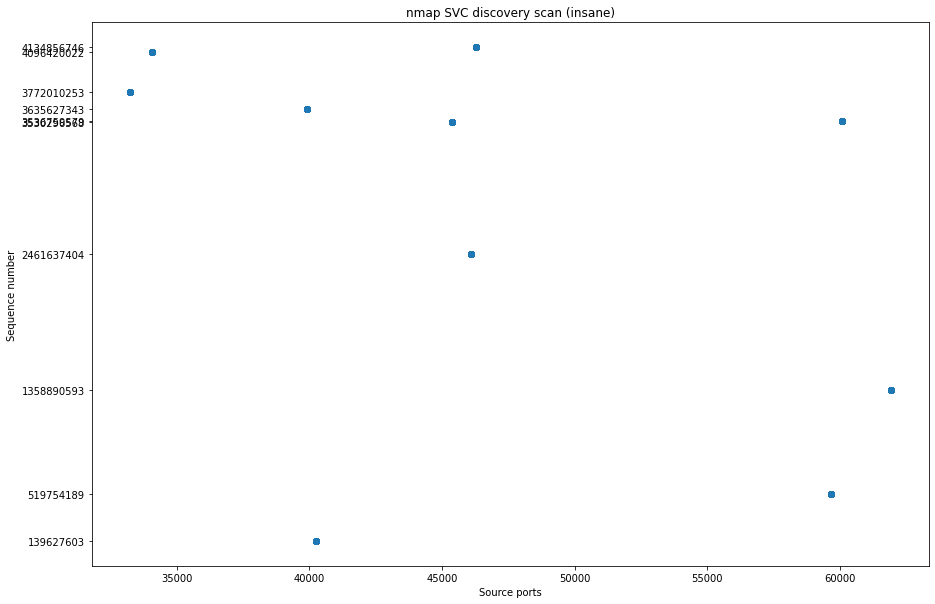

In [30]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [31]:
len(set(orders_port['sport']))

10

## Flags

In [32]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F